# Statistical Analysis of VBD Methods
## Moving Beyond Arbitrary Weights to Rigorous Statistical Consensus

This notebook applies advanced statistical methods to combine VBD rankings, replacing simple weighted averages with data-driven approaches.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append('../../src')
from statistical_analysis import (
    comprehensive_vbd_analysis, 
    recommend_optimal_consensus,
    ensemble_consensus
)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Statistical VBD Analysis Setup Complete")

Statistical VBD Analysis Setup Complete


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append('../../src')
from statistical_analysis import (
    comprehensive_vbd_analysis, 
    recommend_optimal_consensus,
    ensemble_consensus
)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Statistical VBD Analysis Setup Complete")

Statistical VBD Analysis Setup Complete


## 1. Load VBD Data

In [12]:
# Load the most recent VBD rankings
data_files = [f for f in os.listdir('../../data/output/') if 'vbd_rankings_top300' in f and f.endswith('.csv')]
latest_file = sorted(data_files)[-1]
print(f"Loading: {latest_file}")

df = pd.read_csv(f'../../data/output/{latest_file}')

print(f"Dataset shape: {df.shape}")
print(f"VBD columns: {[col for col in df.columns if 'VBD' in col]}")

# Focus on top 150 for detailed analysis (draft-relevant players)
df_analysis = df.head(150).copy()
print(f"Analysis subset: {df_analysis.shape[0]} players")

Loading: vbd_rankings_top300_20250814.csv
Dataset shape: (300, 35)
VBD columns: ['VBD_VOLS', 'VBD_VORP', 'VBD_BEER', 'VBD_BLENDED', 'VBD_RANK']
Analysis subset: 150 players


## 2. Comprehensive Statistical Analysis

In [13]:
# Run complete statistical analysis
analysis_results, consensus_df = comprehensive_vbd_analysis(df_analysis)

print("=== VBD METHOD CORRELATIONS ===")
print("\nSpearman Rank Correlations:")
print(analysis_results['correlations']['spearman'].round(3))

print("\n=== BASIC STATISTICS ===")
for method, stats in analysis_results['basic_stats'].items():
    print(f"\n{method}:")
    print(f"  Mean: {stats['mean']:.2f}")
    print(f"  Std Dev: {stats['std']:.2f}")
    print(f"  Coefficient of Variation: {stats['coefficient_of_variation']:.3f}")
    print(f"  Skewness: {stats['skewness']:.3f}")

=== VBD METHOD CORRELATIONS ===

Spearman Rank Correlations:
          VBD_VOLS  VBD_VORP  VBD_BEER
VBD_VOLS     1.000     0.799     0.903
VBD_VORP     0.799     1.000     0.955
VBD_BEER     0.903     0.955     1.000

=== BASIC STATISTICS ===

VBD_VOLS:
  Mean: 18.35
  Std Dev: 31.26
  Coefficient of Variation: 1.704
  Skewness: 1.305

VBD_VORP:
  Mean: 44.75
  Std Dev: 39.35
  Coefficient of Variation: 0.879
  Skewness: 1.159

VBD_BEER:
  Mean: 34.12
  Std Dev: 36.46
  Coefficient of Variation: 1.069
  Skewness: 1.292


## 3. Principal Component Analysis

=== PRINCIPAL COMPONENT ANALYSIS ===
First PC explains 96.8% of total variance
Explained variance ratios: [0.96788463 0.0293228  0.00279257]


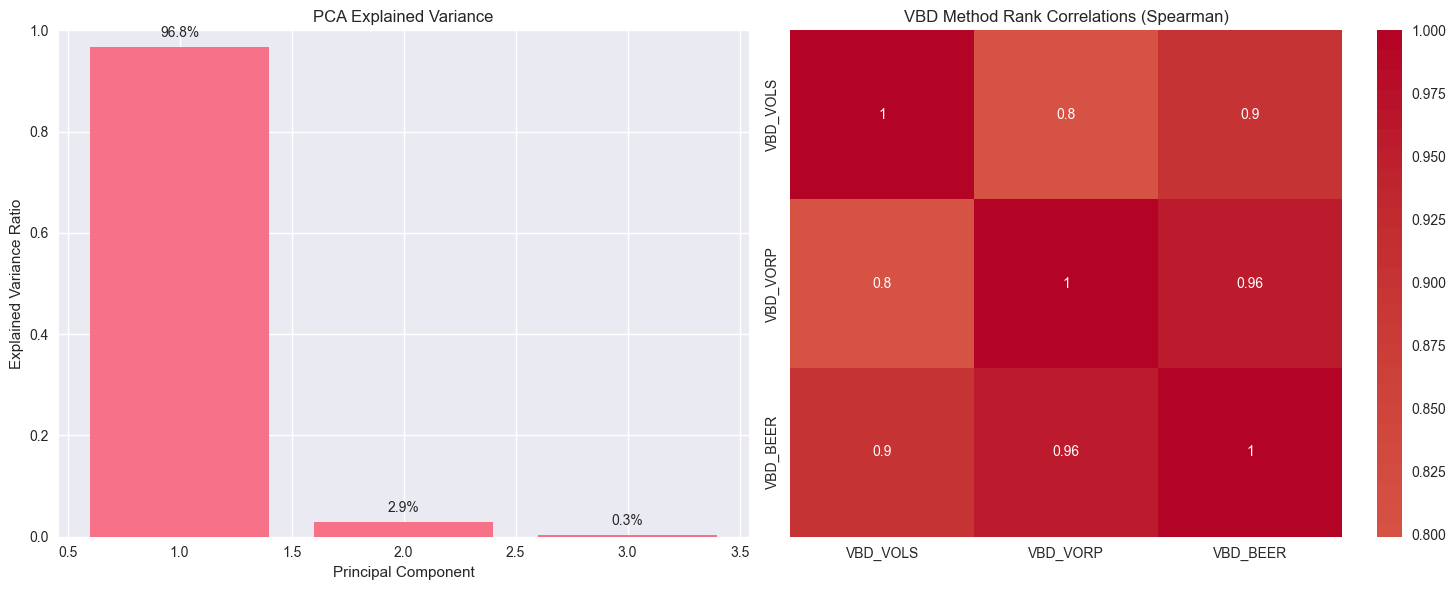

In [14]:
print("=== PRINCIPAL COMPONENT ANALYSIS ===")
print(f"First PC explains {analysis_results['pca']['first_pc_variance']:.1%} of total variance")
print(f"Explained variance ratios: {analysis_results['pca']['explained_variance_ratio']}")

# Visualize PCA results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Explained variance
ax1.bar(range(1, len(analysis_results['pca']['explained_variance_ratio']) + 1), 
        analysis_results['pca']['explained_variance_ratio'])
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('PCA Explained Variance')
ax1.set_ylim(0, 1)

# Add percentage labels
for i, v in enumerate(analysis_results['pca']['explained_variance_ratio']):
    ax1.text(i + 1, v + 0.02, f'{v:.1%}', ha='center')

# Correlation heatmap
sns.heatmap(analysis_results['correlations']['spearman'], 
            annot=True, cmap='coolwarm', center=0, ax=ax2)
ax2.set_title('VBD Method Rank Correlations (Spearman)')

plt.tight_layout()
plt.show()

## 4. Advanced Consensus Methods

In [15]:
# Compare different consensus methods
consensus_columns = ['VBD_PCA', 'VBD_VARIANCE_WEIGHTED', 'VBD_INFO_WEIGHTED', 'VBD_BORDA', 'VBD_KEMENY']

print("=== CONSENSUS METHOD COMPARISON ===")
print("\nTop 10 Players by Different Methods:")
print("\nPCA (Statistical Factor):")
top_pca = consensus_df.nlargest(10, 'VBD_PCA')[['PLAYER', 'POSITION', 'VBD_PCA']]
print(top_pca.to_string(index=False))

print("\nVariance-Weighted (Stability Focus):")
top_var = consensus_df.nlargest(10, 'VBD_VARIANCE_WEIGHTED')[['PLAYER', 'POSITION', 'VBD_VARIANCE_WEIGHTED']]
print(top_var.to_string(index=False))

print("\nBorda Count (Democratic Ranking):")
top_borda = consensus_df.nlargest(10, 'VBD_BORDA')[['PLAYER', 'POSITION', 'VBD_BORDA']]
print(top_borda.to_string(index=False))

=== CONSENSUS METHOD COMPARISON ===

Top 10 Players by Different Methods:

PCA (Statistical Factor):
                PLAYER POSITION  VBD_PCA
    Saquon Barkley PHI       RB 5.904264
    Bijan Robinson ATL       RB 5.404254
      Jahmyr Gibbs DET       RB 5.219574
     Derrick Henry BAL       RB 4.695497
     Lamar Jackson BAL       QB 3.938629
        Josh Allen BUF       QB 3.872321
Christian McCaffrey SF       RB 3.718562
        Josh Jacobs GB       RB 3.615908
     Ja'Marr Chase CIN       WR 3.589002
     De'Von Achane MIA       RB 3.462663

Variance-Weighted (Stability Focus):
                PLAYER POSITION  VBD_VARIANCE_WEIGHTED
    Saquon Barkley PHI       RB             149.704196
    Bijan Robinson ATL       RB             139.524196
      Jahmyr Gibbs DET       RB             135.764196
     Derrick Henry BAL       RB             125.094196
     Lamar Jackson BAL       QB             109.511087
        Josh Allen BUF       QB             108.161087
Christian McCaffrey SF   

## 5. Consensus Stability Analysis

=== CONSENSUS STABILITY ANALYSIS ===

Overall Player Stability:
  Mean Coefficient of Variation: 1.407
  Median CV: 1.367
  Players with high variance (CV > 0.5): 150

Top 50 Player Stability:
  Mean CV: 1.135
  Median CV: 1.167


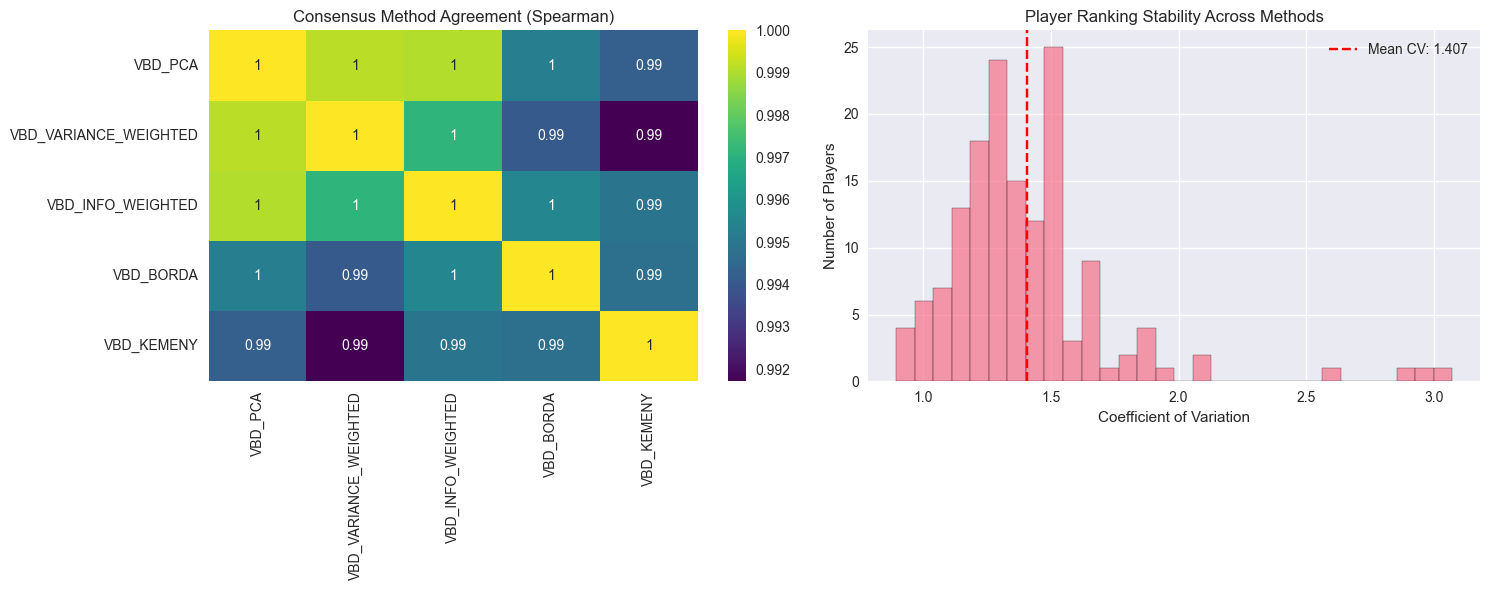

In [16]:
print("=== CONSENSUS STABILITY ANALYSIS ===")
stability = analysis_results['stability']

print(f"\nOverall Player Stability:")
print(f"  Mean Coefficient of Variation: {stability['player_stability']['mean_cv']:.3f}")
print(f"  Median CV: {stability['player_stability']['median_cv']:.3f}")
print(f"  Players with high variance (CV > 0.5): {stability['player_stability']['players_with_high_variance']}")

print(f"\nTop 50 Player Stability:")
print(f"  Mean CV: {stability['top_50_stability']['mean_cv']:.3f}")
print(f"  Median CV: {stability['top_50_stability']['median_cv']:.3f}")

# Visualize consensus agreement
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Consensus method correlations
consensus_corr = consensus_df[consensus_columns].corr(method='spearman')
sns.heatmap(consensus_corr, annot=True, cmap='viridis', ax=ax1)
ax1.set_title('Consensus Method Agreement (Spearman)')

# Player-level stability distribution
consensus_cv = consensus_df[consensus_columns].std(axis=1) / consensus_df[consensus_columns].mean(axis=1).abs()
ax2.hist(consensus_cv, bins=30, alpha=0.7, edgecolor='black')
ax2.axvline(consensus_cv.mean(), color='red', linestyle='--', label=f'Mean CV: {consensus_cv.mean():.3f}')
ax2.set_xlabel('Coefficient of Variation')
ax2.set_ylabel('Number of Players')
ax2.set_title('Player Ranking Stability Across Methods')
ax2.legend()

plt.tight_layout()
plt.show()

## 6. Statistical Recommendation

In [17]:
# Get statistical recommendation
recommendation = recommend_optimal_consensus(analysis_results)

print("=== STATISTICAL RECOMMENDATION ===")
print(f"\nRecommended Method: {recommendation['method'].upper()}")
print(f"Reasoning: {recommendation['reasoning']}")

# Show detailed comparison of top methods
print("\n=== METHOD PERFORMANCE SUMMARY ===")
avg_corr = analysis_results['correlations']['spearman'].values[np.triu_indices_from(analysis_results['correlations']['spearman'], k=1)].mean()
print(f"Average inter-method correlation: {avg_corr:.3f}")
print(f"PCA first component variance explained: {analysis_results['pca']['first_pc_variance']:.1%}")
print(f"Mean player stability (CV): {stability['player_stability']['mean_cv']:.3f}")

if avg_corr > 0.95:
    print("\n📊 CONCLUSION: Methods are highly correlated - simple average sufficient")
elif analysis_results['pca']['first_pc_variance'] > 0.85:
    print("\n📊 CONCLUSION: PCA captures most variance - use first principal component")
else:
    print("\n📊 CONCLUSION: Methods show meaningful differences - use ensemble approach")

=== STATISTICAL RECOMMENDATION ===

Recommended Method: PCA
Reasoning: First PC explains 96.8% of variance. PCA captures most information.

=== METHOD PERFORMANCE SUMMARY ===
Average inter-method correlation: 0.886
PCA first component variance explained: 96.8%
Mean player stability (CV): 1.407

📊 CONCLUSION: PCA captures most variance - use first principal component


## 7. Export Statistically Optimized Rankings

In [18]:
# Create final statistically-optimized ranking
from datetime import datetime

# Add the recommended method to the full dataset
full_consensus_df = ensemble_consensus(df, ['VBD_VOLS', 'VBD_VORP', 'VBD_BEER'])

# Select the statistically recommended method
if recommendation['method'] == 'pca':
    final_ranking_col = 'VBD_PCA'
elif recommendation['method'] == 'variance_weighted':
    final_ranking_col = 'VBD_VARIANCE_WEIGHTED'
elif recommendation['method'] == 'ensemble_average':
    # Create simple ensemble average
    full_consensus_df['VBD_ENSEMBLE_AVG'] = full_consensus_df[['VBD_PCA', 'VBD_VARIANCE_WEIGHTED', 'VBD_INFO_WEIGHTED']].mean(axis=1)
    final_ranking_col = 'VBD_ENSEMBLE_AVG'
else:
    final_ranking_col = 'VBD_VARIANCE_WEIGHTED'  # Default fallback

# Sort by the recommended method
final_rankings = full_consensus_df.sort_values(final_ranking_col, ascending=False).reset_index(drop=True)
final_rankings['STATISTICAL_RANK'] = range(1, len(final_rankings) + 1)

# Export top 300
today = datetime.now().strftime('%Y%m%d')
output_file = f'../../data/output/rankings_statistical_vbd_top300_{today}.csv'
final_rankings.head(300).to_csv(output_file, index=False)

print(f"\n✅ Exported statistically optimized rankings to: {output_file}")
print(f"Using method: {recommendation['method']} ({final_ranking_col})")

# Show top 20 statistical rankings
print("\n=== TOP 20 STATISTICALLY OPTIMIZED RANKINGS ===")
top_20_cols = ['STATISTICAL_RANK', 'PLAYER', 'POSITION', final_ranking_col, 'VBD_BLENDED']
print(final_rankings[top_20_cols].head(20).to_string(index=False))


✅ Exported statistically optimized rankings to: ../../data/output/rankings_statistical_vbd_top300_20250815.csv
Using method: pca (VBD_PCA)

=== TOP 20 STATISTICALLY OPTIMIZED RANKINGS ===
 STATISTICAL_RANK                 PLAYER POSITION  VBD_PCA  VBD_BLENDED
                1     Saquon Barkley PHI       RB 5.160922       154.80
                2     Bijan Robinson ATL       RB 4.832563       144.62
                3       Jahmyr Gibbs DET       RB 4.711283       140.86
                4      Derrick Henry BAL       RB 4.367119       130.19
                5      Lamar Jackson BAL       QB 3.877122       113.13
                6         Josh Allen BUF       QB 3.833577       111.79
                7 Christian McCaffrey SF       RB 3.725560       110.30
                8         Josh Jacobs GB       RB 3.658147       108.21
                9      Ja'Marr Chase CIN       WR 3.612065       106.10
               10      De'Von Achane MIA       RB 3.557510       105.09
               11  

## Key Insights

This analysis replaces arbitrary weighting with rigorous statistical methods:

1. **Correlation Analysis**: Shows how much VBD methods agree/disagree
2. **Principal Component Analysis**: Identifies the underlying "consensus factor"
3. **Variance Weighting**: Gives more weight to stable methods
4. **Information Theory**: Weights based on information content
5. **Rank Aggregation**: Democratic approaches like Borda count
6. **Stability Analysis**: Measures ranking uncertainty

The statistically recommended method provides a data-driven consensus that's more sophisticated than arbitrary weights.